In [1]:
import contextily as cx
import geopandas as gpd
import pandas as pd
import numpy as np
import cenpy 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pathlib import Path 
import seaborn
import shapely
%matplotlib inline

In [6]:
df = pd.read_csv('/Users/kendallschroth/Downloads/emissions1.csv')
emissions = gpd.GeoDataFrame(df)

#create polygon shapes to plot
for i in range(len(emissions['geometry'])):
    emissions['geometry'][i] = shapely.wkt.loads(emissions['geometry'][i])
    
emissions = emissions.rename(columns={"2018 Total GHG Emissions (Metric Tons CO2e)": "2018 Total GHG Emissions", 
                                      "2021 Total GHG Emissions (Metric Tons CO2e)": "2021 Total GHG Emissions"})

/var/folders/5x/cr898w1d4mx42ptsmgxnnfcm0000gn/T/ipykernel_77360/1442748815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions['geometry'][i] = shapely.wkt.loads(emissions['geometry'][i])


In [7]:
emissions["pct_white_17"] = emissions["race_white_2017"] / \
                  (emissions["pop_density_2017"] + \
                   (emissions["pop_density_2017"]==0) * 1
                  )
emissions["pct_black_17"] = emissions["race_black_2017"] / \
                  (emissions["pop_density_2017"] + \
                   (emissions["pop_density_2017"]==0) * 1
                  )
emissions["pct_asian_17"] = emissions["asain_white_2017"] / \
                  (emissions["pop_density_2017"] + \
                   (emissions["pop_density_2017"]==0) * 1
                  )
emissions["pct_white_19"] = emissions["race_white_2019"] / \
                  (emissions["race_total_19"] + \
                   (emissions["race_total_19"]==0) * 1
                  )
emissions["pct_black_19"] = emissions["race_black_2019"] / \
                  (emissions["race_total_19"] + \
                   (emissions["race_total_19"]==0) * 1
                  )
emissions["pct_asian_19"] = emissions["asain_white_2019"] / \
                  (emissions["race_total_19"] + \
                   (emissions["race_total_19"]==0) * 1
                  )
emissions["inc_dens17"] = emissions["income2017"] / \
                  (emissions["pop_density_2017"] + \
                   (emissions["pop_density_2017"]==0) * 1
                  )
emissions["inc_dens19"] = emissions["income2019"] / \
                  (emissions["pop_density_2019"] + \
                   (emissions["pop_density_2019"]==0) * 1
                  )

## DIFFERENCES COLUMNS

In [8]:
emissions["emiss_diff"] = emissions['2021 Total GHG Emissions'] - \
        emissions['2018 Total GHG Emissions']
emissions["inc_diff"] = emissions["income2019"] - \
        emissions['income2017']
emissions["inc_dens_diff"] = emissions["inc_dens19"] - \
        emissions['inc_dens17']

In [9]:
a = sum(emissions["2021 Total GHG Emissions"])
b =  sum(emissions["2018 Total GHG Emissions"])
b-a

818186.200000002

<Figure size 50x50 with 0 Axes>

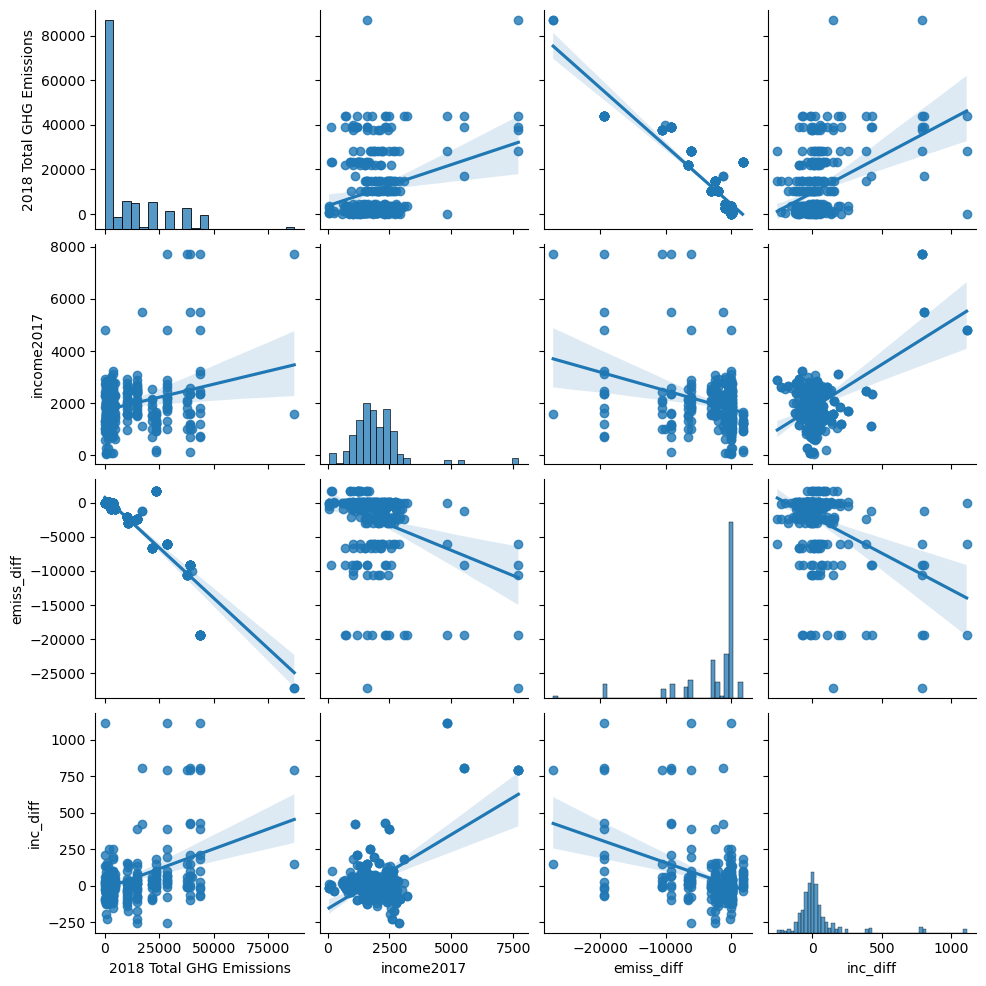

In [10]:
cluster_variables = ['2018 Total GHG Emissions',
                    'income2017','emiss_diff', 'inc_diff']
spec_cluster = ['emiss_diff', '2018 Total GHG Emissions']# , '2021 Total GHG Emissions (Metric Tons CO2e)']
                     
_ = plt.figure(figsize = (0.5,0.5))
_=seaborn.pairplot(emissions[cluster_variables], kind='reg', diag_kind='auto')
plt.show()
#emissions[cluster_variables].corr()

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import sklearn.cluster as clust

In [12]:
clusters = emissions.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'index', 
        'geometry', 'sqmi', 'state', 'zip_code', 'tract_x', 'inc_zips',
       'zip', 'GEOID_x', 'geometry_x', 'race_white_2017', 
        '2021 Total GHG Emissions', 
        'race_black_2017', 'asain_white_2017', 'pop_density_2019',
       'race_white_2019', 'race_black_2019', 'asain_white_2019', 'income2019',
       'race_total_17', 'race_total_19', 'pct_white_17', 'pct_black_17', 
        'pct_white_19', 'pct_black_19', 'pct_asian_19', 'pct_asian_17'])

In [13]:
clusters.corr()

,2018 Total GHG Emissions,pop_density_2017,income2017,inc_dens17,inc_dens19,emiss_diff,inc_diff,inc_dens_diff
2018 Total GHG Emissions,1.000000,0.044705,0.271834,0.352869,0.355803,-0.876214,0.423357,-0.045256
pop_density_2017,0.044705,1.000000,0.854083,-0.229434,-0.269110,-0.108320,0.430320,-0.155827
income2017,0.271834,0.854083,1.000000,0.242474,0.192171,-0.324453,0.582744,-0.287716
inc_dens17,0.352869,-0.229434,0.242474,1.000000,0.980483,-0.346279,0.167294,-0.264756
inc_dens19,0.355803,-0.269110,0.192171,0.980483,1.000000,-0.331955,0.163631,-0.070001
emiss_diff,-0.876214,-0.108320,-0.324453,-0.346279,-0.331955,1.000000,-0.409617,0.128789
inc_diff,0.423357,0.430320,0.582744,0.167294,0.163631,-0.409617,1.000000,-0.046244
inc_dens_diff,-0.045256,-0.155827,-0.287716,-0.264756,-0.070001,0.128789,-0.046244,1.000000


In [14]:
K=range(1,12)
wss = []
for k in K:
    kmeans=clust.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(clusters)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

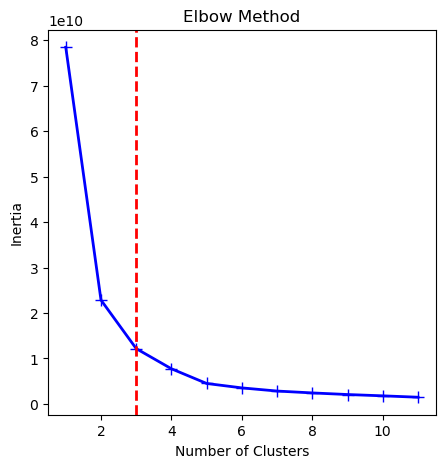

In [15]:
_ = plt.figure(figsize = (5,5))
_ = plt.plot(range(1,12), wss, linewidth = 2, color = 'blue', marker='+', markersize = 8)
_ = plt.title('Elbow Method', fontsize = 12)
_ = plt.xlabel('Number of Clusters',fontsize = 10)
_ = plt.ylabel('Inertia',fontsize = 10)

n_clusters = 3

_ = plt.axvline(x = 3, linewidth = 2, color = 'red', linestyle = '--')

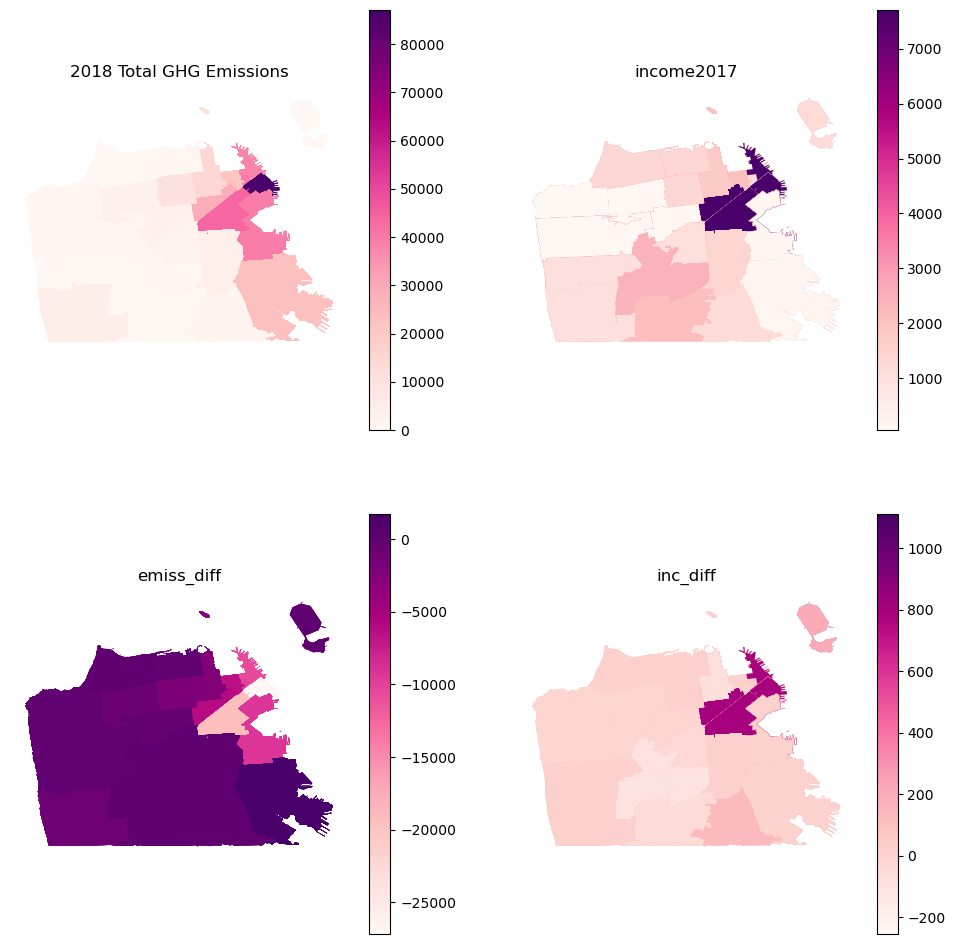

In [21]:
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    emissions.plot(column=col, ax=ax, 
            linewidth=0, cmap='RdPu',legend=True)
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3)
np.random.seed(7777)
k5cls = kmeans.fit(emissions[cluster_variables])
emissions['k5cls'] = k5cls.labels_

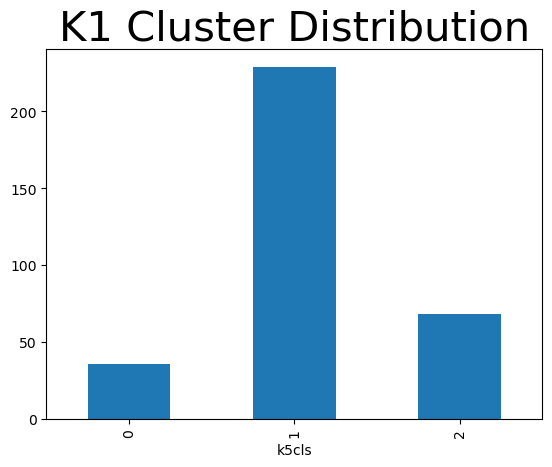

In [23]:
#distribustion 
k1sizes = emissions.groupby('k5cls').size()
k1sizes

k1_plot = k1sizes.plot.bar()

plt.title('K1 Cluster Distribution', fontsize=30)
plt.show()

In [24]:
emissions.crs

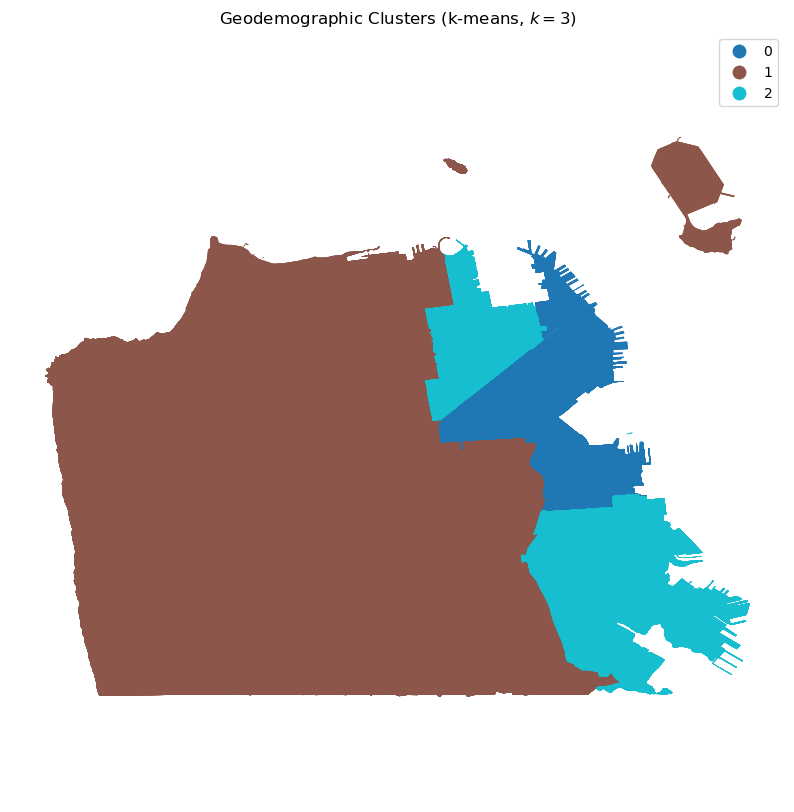

In [26]:
f, ax = plt.subplots(1, figsize=(10,10))
emissions.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title(r'Geodemographic Clusters (k-means, $k=3$)')
plt.show()

In [27]:
k4means = emissions.groupby('k5cls')[cluster_variables].mean()
k4means

,2018 Total GHG Emissions,income2017,emiss_diff,inc_diff
k5cls,,,,
0,43329.480556,2652.555556,-14164.041667,242.055556
1,2731.433624,1811.244541,-449.959825,-2.729258
2,21202.627941,2006.279412,-3018.233824,67.352941


In [29]:
k4sums = emissions.groupby('k5cls')[['2018 Total GHG Emissions',
                     'income2017', 'inc_dens17', 'inc_dens_diff',
                     'emiss_diff', 'inc_diff', 'pop_density_2017']].sum()
k4sums

,2018 Total GHG Emissions,income2017,inc_dens17,inc_dens_diff,emiss_diff,inc_diff,pop_density_2017
k5cls,,,,,,,
0,1559861.3,95492.0,18.192200,-0.338364,-509905.5,8714.0,185117.0
1,625498.3,414775.0,94.052793,-0.525595,-103040.8,-625.0,1053007.0
2,1441778.7,136427.0,34.838159,0.086518,-205239.9,4580.0,270431.0


In [30]:
# Index db on cluster ID
tidy_db = emissions.set_index('k5cls')
# Keep only variables used for clustering
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})

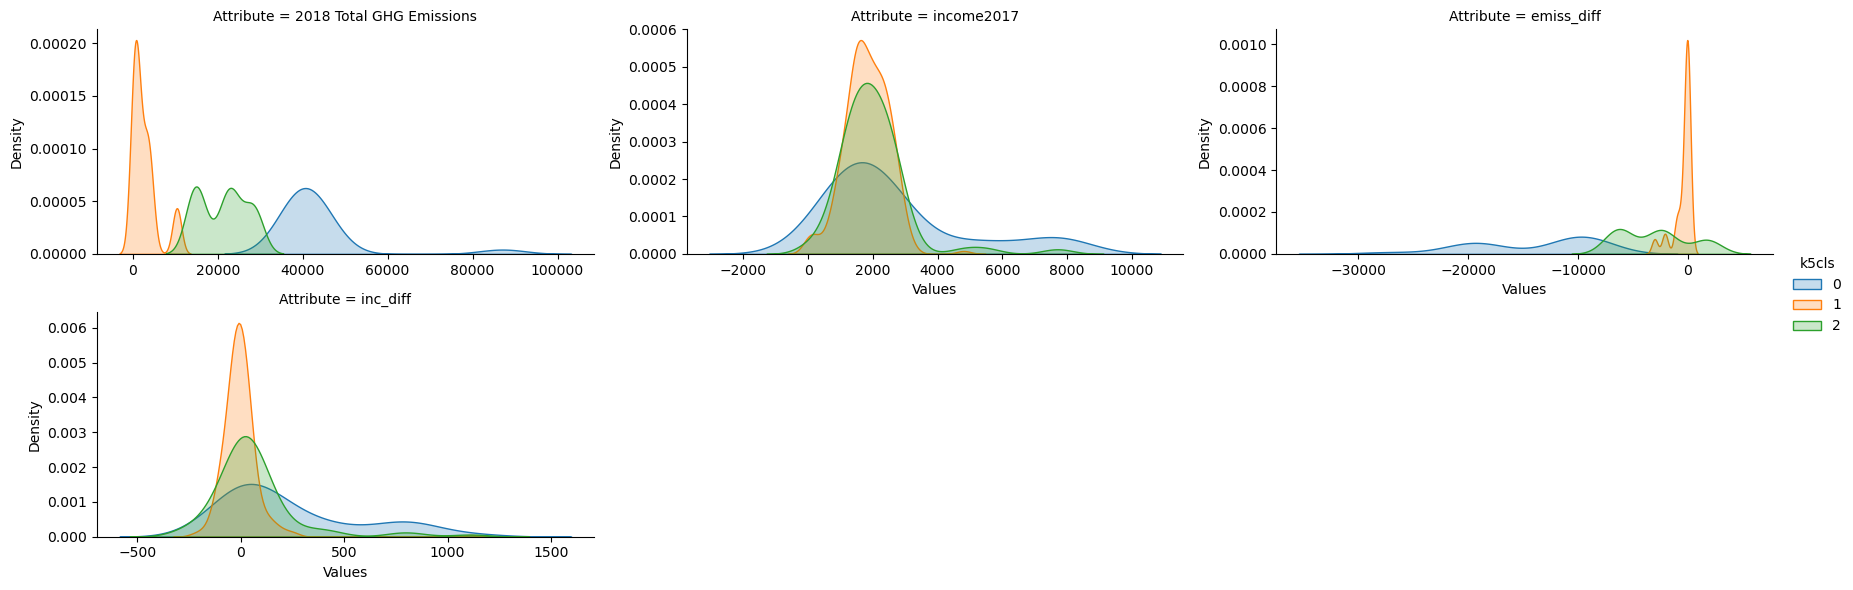

In [31]:
# Setup the facets
facets = sns.FacetGrid(data=tidy_db, col='Attribute', hue='k5cls', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
# Build the plot from `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', fill=True).add_legend()
plt.show()

In [32]:
from pathlib import Path  
filepath = Path('/Users/kendallschroth/Downloads/Remissions.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
emissions.to_csv(filepath)  